In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset=pd.read_csv("/content/cleaned_dataset.csv")
dataset

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,1,0,group C,some college,standard,1,69,90,88,247
2,2,0,group B,master's degree,standard,0,90,95,93,278
3,3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...,...
995,995,0,group E,master's degree,standard,1,88,99,95,282
996,996,1,group C,high school,free/reduced,0,62,55,55,172
997,997,0,group C,high school,free/reduced,1,59,71,65,195
998,998,0,group D,some college,standard,1,68,78,77,223


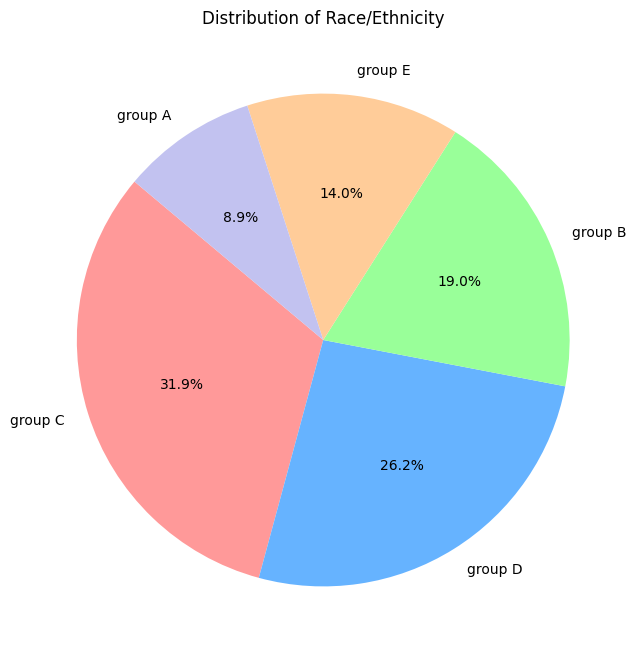

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
labels = dataset['race/ethnicity'].value_counts().index
sizes = dataset['race/ethnicity'].value_counts().values

# Change the colors to your desired ones
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Race/Ethnicity')
plt.show()



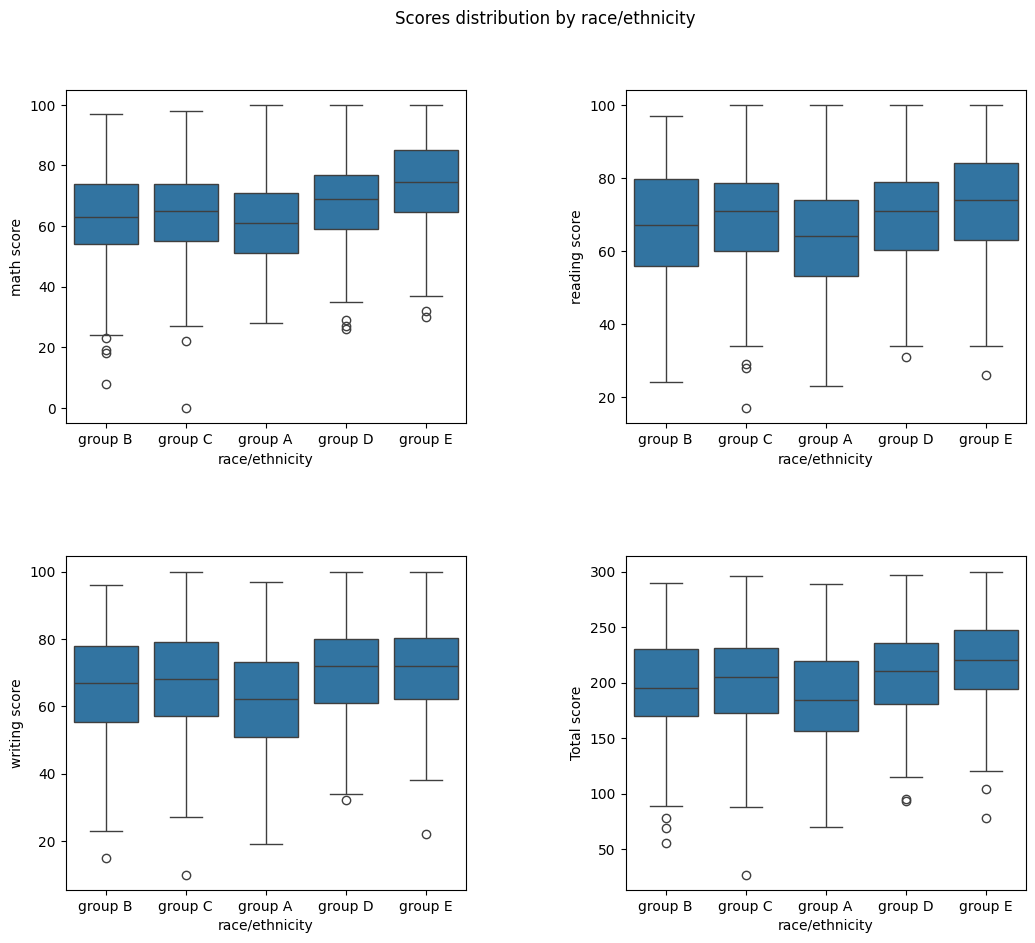

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Total score' is a computed column in your dataset
dataset['Total score'] = dataset['math score'] + dataset['reading score'] + dataset['writing score']

figure, axis = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=dataset['race/ethnicity'], y=dataset['math score'], ax=axis[0, 0])
sns.boxplot(x=dataset['race/ethnicity'], y=dataset['reading score'], ax=axis[0, 1])
sns.boxplot(x=dataset['race/ethnicity'], y=dataset['writing score'], ax=axis[1, 0])
sns.boxplot(x=dataset['race/ethnicity'], y=dataset['Total score'], ax=axis[1, 1])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.suptitle('Scores distribution by race/ethnicity')
plt.show()


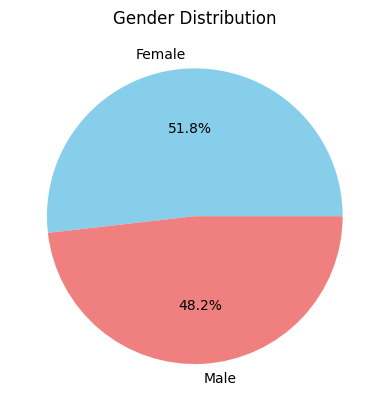

In [17]:
import matplotlib.pyplot as plt

# Choose your desired colors
colors = ['skyblue', 'lightcoral']

# Create a pie chart with custom colors
plt.pie(dataset['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')
plt.show()


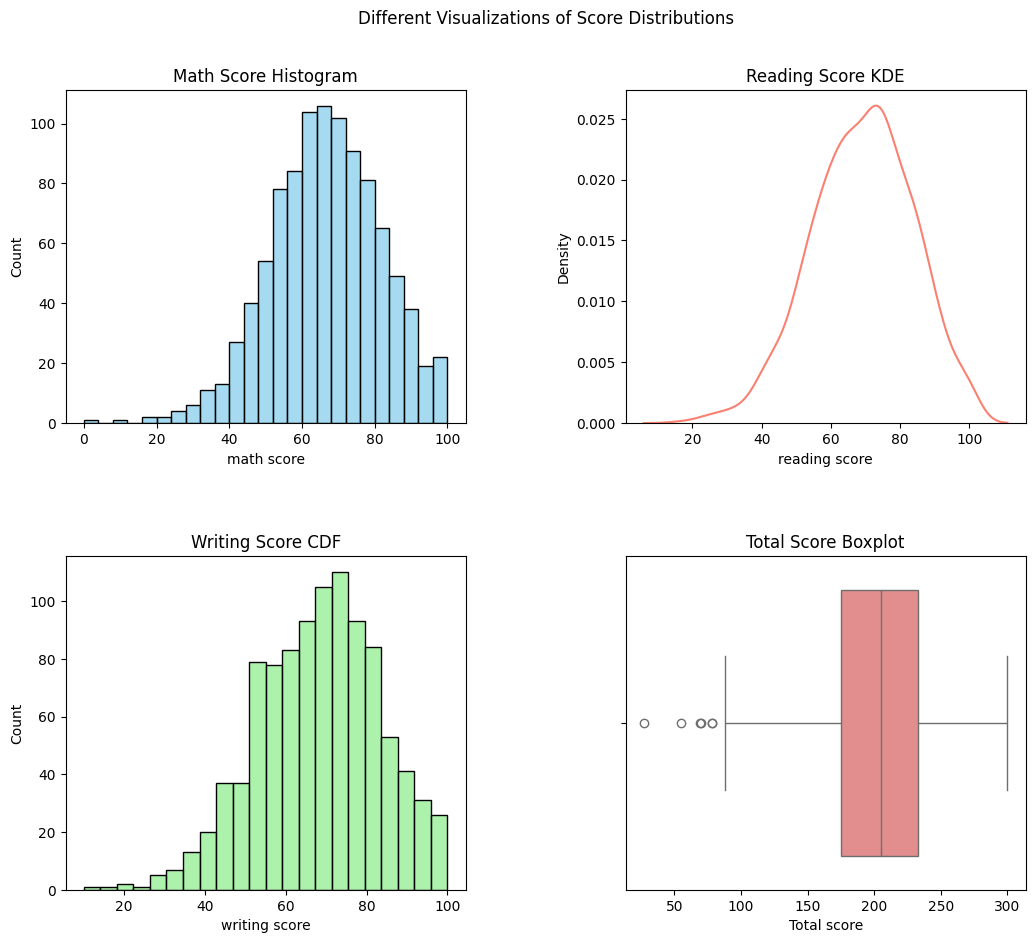

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, axis = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
sns.histplot(dataset['math score'], ax=axis[0, 0], label='math score', color='skyblue')
axis[0, 0].set_title('Math Score Histogram')

# Kernel Density Estimate (KDE)
sns.kdeplot(dataset['reading score'], ax=axis[0, 1], label='reading score', color='salmon')
axis[0, 1].set_title('Reading Score KDE')

# Cumulative Distribution Function (CDF)
sns.histplot(dataset['writing score'], ax=axis[1, 0], label='writing score', kde_kws={'cumulative': True}, color='lightgreen')
axis[1, 0].set_title('Writing Score CDF')

# Boxplot
sns.boxplot(x=dataset['Total score'], ax=axis[1, 1], color='lightcoral')
axis[1, 1].set_title('Total Score Boxplot')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.suptitle('Different Visualizations of Score Distributions')
plt.show()


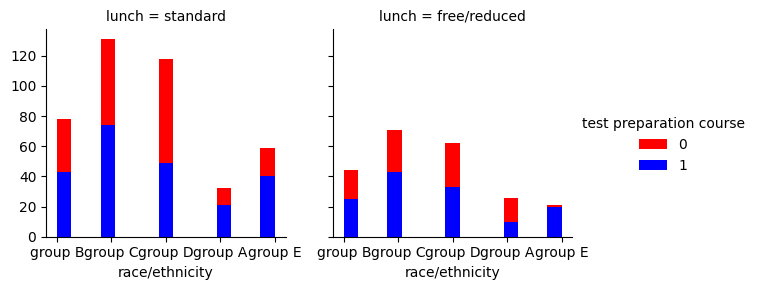

In [18]:

graph = sns.FacetGrid(dataset, col ='lunch',hue_kws={'color': ['r', 'b']}, hue ='test preparation course')

graph.map(plt.hist, 'race/ethnicity', bins = 15, color ='orange').add_legend()


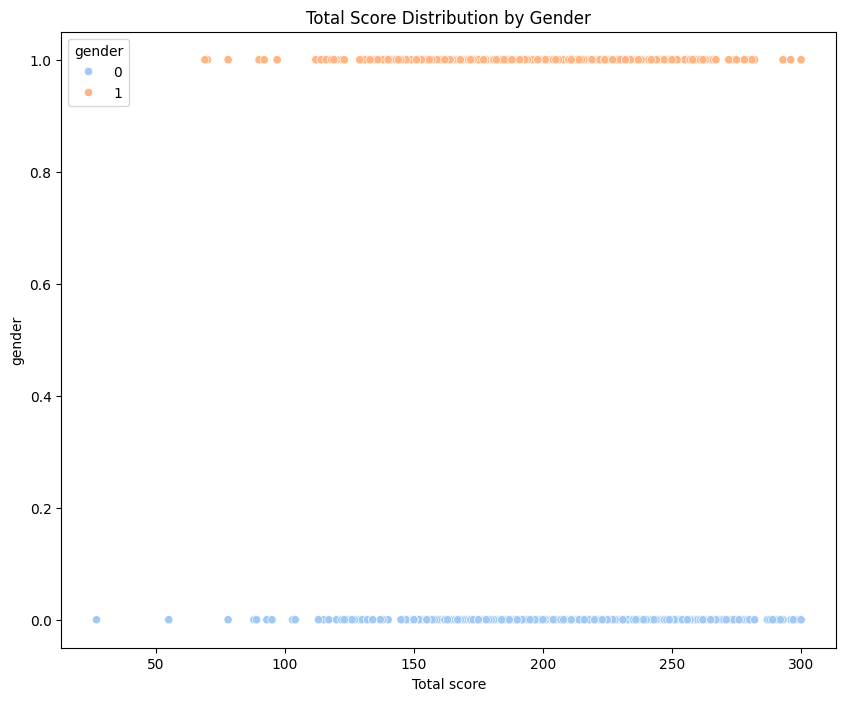

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total score', y='gender', data=dataset, hue='gender', palette='pastel')
plt.title('Total Score Distribution by Gender')
plt.show()


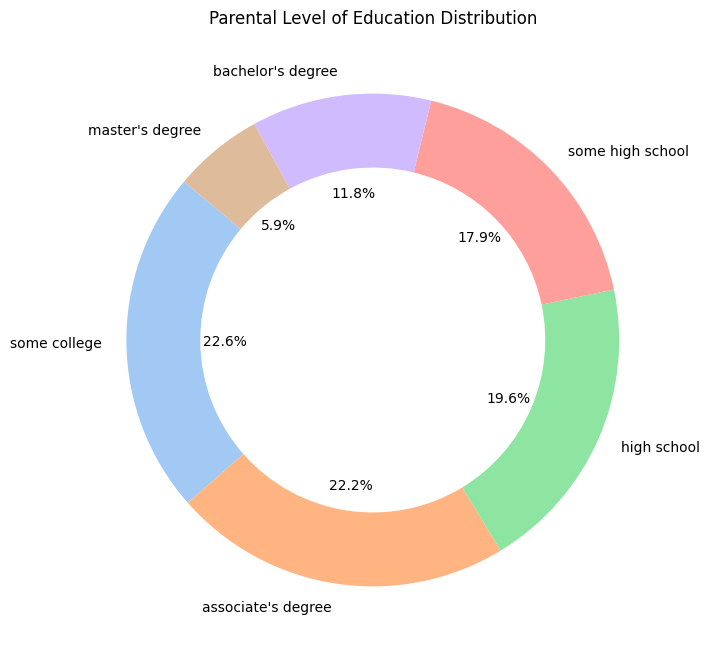

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a donut chart
plt.figure(figsize=(8, 8))
labels = dataset['parental level of education'].value_counts().index
sizes = dataset['parental level of education'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Parental Level of Education Distribution')
plt.show()



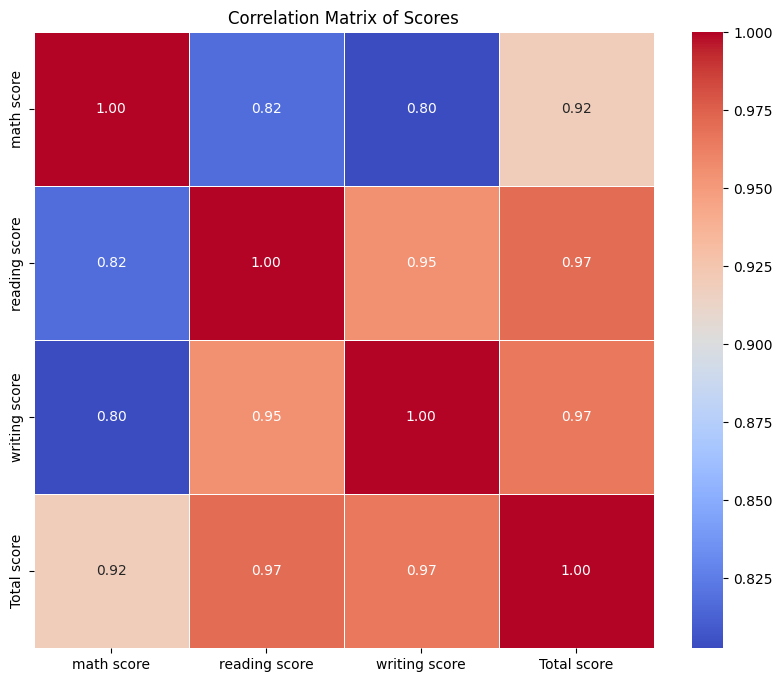

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dataset[['math score', 'reading score', 'writing score', 'Total score']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Scores')
plt.show()
